# Time-Series Analysis Cookbook

## Loading

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

In [6]:
# to work with url csv files, github view raws
url = 'https://raw.githubusercontent.com/Mukhammadkodir27/Advanced_Python/refs/heads/main/Machine_Learning/Time-Series/data/stock_prices.csv'

In [21]:
df = pd.read_csv(url, sep=',', parse_dates = ['date'], index_col = 'date')

In [25]:
df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391


In [29]:
url = 'https://tscookbook.s3.amazonaws.com/AirQualityUCI.xlsx'

In [31]:
df = pd.read_excel(url, index_col = 'Date', parse_dates = True)

In [33]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


=> pandas offers an elegant way to read HTML tables and convert the content into a pandas 
DataFrame using the pandas.read_html() function:

In [49]:
# In the following recipe, we will extract HTML tables from Wikipedia for COVID-19 
# pandemic tracking cases by country and by territory (https://en.wikipedia.
# org/wiki/COVID-19_pandemic_by_country_and_territory):

In [51]:
url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"

In [57]:
results = pd.read_html(url)

In [59]:
print(len(results))

68


In [65]:
print(results)

[                                    COVID-19 pandemic  \
0   Confirmed deaths per 100,000 population,[1][no...   
1                                             Disease   
2                                        Virus strain   
3                                              Source   
4                                            Location   
5                                      First outbreak   
6                                          Index case   
7                                                Date   
8                                     Confirmed cases   
9                                              Deaths   
10                                       Vaccinations   

                                  COVID-19 pandemic.1  
0   Confirmed deaths per 100,000 population,[1][no...  
1                                            COVID-19  
2                                          SARS-CoV-2  
3      Probably bats, possibly via pangolins[2][3][4]  
4                                 

In [75]:
df = results[15]

In [77]:
df.columns

Index(['Region[30]', 'Total cases', 'Total deaths', 'Cases per million',
       'Deaths per million', 'Current weekly cases', 'Current weekly deaths',
       'Population millions', 'Vacci­nated %[31]'],
      dtype='object')

In [79]:
df[['Total cases', 'Total deaths', 'Cases per million']].head()

,Total cases,Total deaths,Cases per million
0,179537758,1185108,401363
1,103783777,1133607,281404
2,57721948,498259,247054
3,65835789,1313061,153151
4,25646533,434988,108307


### Reading Time Series Data from Databases

In [108]:
# reading a third-party financial data using APIs

In [112]:
# !pip install pandas-datareader

In [8]:
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
# create start_date, end_date, and tickers
start_date = (datetime.datetime.today() - 
              datetime.timedelta(weeks=52*10)).strftime('%Y-%m-%d')
end_date = datetime.datetime.today().strftime('%Y-%m-%d')
tickers = ['MSFT', 'AAPL']

In [12]:
dt = yf.download(tickers, start=start_date, end=end_date)['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [14]:
dt.tail(3)

Ticker,AAPL,MSFT
Date,,
2025-03-26,221.529999,389.970001
2025-03-27,223.850006,390.579987
2025-03-28,217.899994,378.799988


## Handling Missing Data

As a data scientist, data analyst, or business analyst, you have probably discovered that 
obtaining a perfect clean dataset is too optimistic. What is more common, though, is that 
the data you are working with suffers from flaws such as missing values, erroneous data, 
duplicate records, insufficient data, or the presence of outliers in the data. 

Time series data is no different, and before plugging the data into any analysis or modeling 
workflow, you must investigate the data first. It is vital to understand the business context 
around the time series data to detect and identify these problems successfully. For example, 
if you work with stock data, the context is very different from COVID data or sensor data. 

Having that intuition or domain knowledge will allow you to anticipate what to expect 
and what is considered acceptable when analyzing the data. Always try to understand the 
business context around the data. For example, why is the data collected in the first place? 

How was the data collected? What business rules, logic, or transformations have been 
applied to the data? Were these modifications applied during the data acquisition process 
or built into the systems that generate the data? 

 During the discovery phase, such prior knowledge will help you determine the best 
approach to clean and prepare your dataset for analysis or modeling. Missing data and 
outliers are two common problems that need to be dealt with during data cleaning and 
preparation. You will dive into outlier detection in Chapter 8, Outlier Detection Using 
Statistical Methods, and Chapter 14, Outlier Detection Using Unsupervised Machine 
Learning. In this chapter, you will explore techniques to handle missing data through 
imputation and interpolation.

In [174]:
# !pip install scipy

In [178]:
df.isnull().sum()

Region[30]               0
Total cases              0
Total deaths             0
Cases per million        0
Deaths per million       0
Current weekly cases     0
Current weekly deaths    0
Population millions      0
Vacci­nated %[31]        0
dtype: int64

In [180]:
df.isna().sum()

Region[30]               0
Total cases              0
Total deaths             0
Cases per million        0
Deaths per million       0
Current weekly cases     0
Current weekly deaths    0
Population millions      0
Vacci­nated %[31]        0
dtype: int64

In [182]:
df.isna().sum().sum()

0

In [236]:
# df.describe()

In [238]:
# df.describe(include='O')

In [193]:
df.describe(include = 'all')

,Region[30],Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vacci­nated %[31]
count,14,1.400000e+01,1.400000e+01,14.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000
unique,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,European Union,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.291499e+07,9.421984e+05,119687.571429,1342.357143,5.689899e+05,1837.142857,1108.428571,62.992857
std,NaN,1.672869e+08,1.679820e+06,114797.383407,1093.008523,1.068662e+06,3431.739116,2000.644501,16.653919
min,NaN,2.605473e+06,2.623700e+04,7598.000000,106.000000,6.680000e+02,8.000000,43.000000,27.600000
25%,NaN,1.414140e+07,2.019590e+05,39356.750000,448.500000,8.584250e+03,36.500000,234.750000,52.900000
50%,NaN,5.403454e+07,4.078240e+05,85113.000000,881.000000,6.731100e+04,328.000000,399.500000,68.000000
75%,NaN,6.457848e+07,1.005260e+06,141940.000000,2129.500000,6.021532e+05,2395.750000,997.000000,74.350000


In [18]:
df.replace('?', np.NaN, inplace = True)

In [20]:
dt['AAPL'] = dt['AAPL'].astype('float')

In [22]:
dt.shape

(2507, 2)

In [24]:
dt.plot(backend='hvplot')

:NdOverlay   [Ticker]
   :Curve   [Date]   (value)

## Outlier Detection
### Using Statistical Methods
=> `point outlier` occurs when a data point deviates from the rest of the population - sometimes referred to as a `global outlier`. \
=> `Collective outliers` - which are group of observations, differ from the population and don't follow the expected pattern. \
=> `Contextual outliers` - occur when an observation is considered an outlier based on a particular condition or context, such as deviation from neighboring data points.\
!Note that with contextual outliers, the same observation may not be considered an outlier if the context changes.

=> `anomaly detection` can be synonymous with `outlier detection`

<Axes: xlabel='Date'>

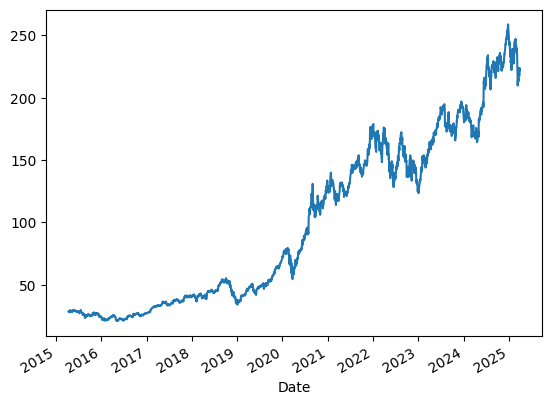

In [26]:
dt.AAPL.plot(alpha = 1.0)

In [134]:
# plot_outliers function
def plot_outliers(outliers, data, method = 'KNN', 
                 halignment = 'right', 
                 valignment = 'bottom', 
                 labels = False):
    ax = data.plot(alpha = 1.0)
    
    if labels:
        for i in outliers['value'].item():
            plt.plot(i[0], i[1], 'rx')
            plt.text(i[0], i[1], f'{i[0].date()}', 
                    horizontalalignment=halignment, 
                    verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rx')

    plt.title(f'Name - {method}')
    plt.xlabel('date'); plt.ylabel('# of passengers')
    plt.legend(['outliers'])
    plt.show()
    
# As we proceed with the outlier detection recipes, the goal is to see how the different 
# techniques capture outliers and compare them to the ground truth labels

## Resampling

In [30]:
df_downsampled = dt.resample('W').mean()

In [32]:
df_downsampled.head()

Ticker,AAPL,MSFT
Date,,
2015-04-19,28.177253,36.154147
2015-04-26,28.723510,37.932079
2015-05-03,28.851700,42.040305
2015-05-10,28.293221,40.835452
2015-05-17,28.522351,41.318777


In [34]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2015-04-19 to 2025-03-30
Freq: W-SUN
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    520 non-null    float64
 1   MSFT    520 non-null    float64
dtypes: float64(2)
memory usage: 12.2 KB


In [36]:
df_downsampled.index[0]

Timestamp('2015-04-19 00:00:00')

In [38]:
df_downsampled.index.freq

<Week: weekday=6>

In [40]:
df_downsampled.shape

(520, 2)

In [42]:
# Resample the data one more time, but this time as a 3-day frequency. You can do 
# this by using '3D'. This time, use the .sum() method instead:
df_downsampled2 = dt.resample('3W').sum()

In [44]:
df_downsampled2.head()

Ticker,AAPL,MSFT
Date,,
2015-04-19,140.886267,180.770737
2015-05-10,429.342155,604.039181
2015-05-31,406.783924,576.383324
2015-06-21,431.654427,602.865635
2015-07-12,394.162569,545.636841


In [46]:
df_downsampled2.index.freq

<3 * Weeks: weekday=6>

In [48]:
df_downsampled2.shape

(174, 2)

In [50]:
# from daily frequency to 12 hourly frequency
df_upsampling = dt.resample('12H').fillna('ffill')

C:\Users\khali\AppData\Local\Temp\ipykernel_10556\2589856878.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_upsampling = dt.resample('12H').fillna('ffill')
C:\Users\khali\AppData\Local\Temp\ipykernel_10556\2589856878.py:2: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  df_upsampling = dt.resample('12H').fillna('ffill')


In [52]:
df_upsampling.head()

Ticker,AAPL,MSFT
Date,,
2015-04-13 00:00:00,28.329117,36.041946
2015-04-13 12:00:00,28.329117,36.041946
2015-04-14 00:00:00,28.206282,35.947010
2015-04-14 12:00:00,28.206282,35.947010
2015-04-15 00:00:00,28.313484,36.473484


In [54]:
df_upsampling.index.freq

<12 * Hours>

## Detecting outliers using visualizations

<Axes: ylabel='Count'>

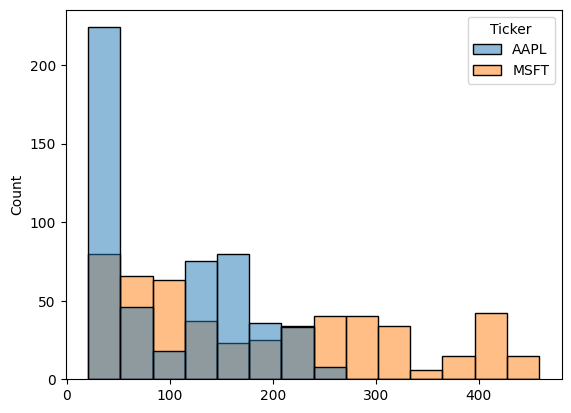

In [56]:
sns.histplot(df_downsampled)

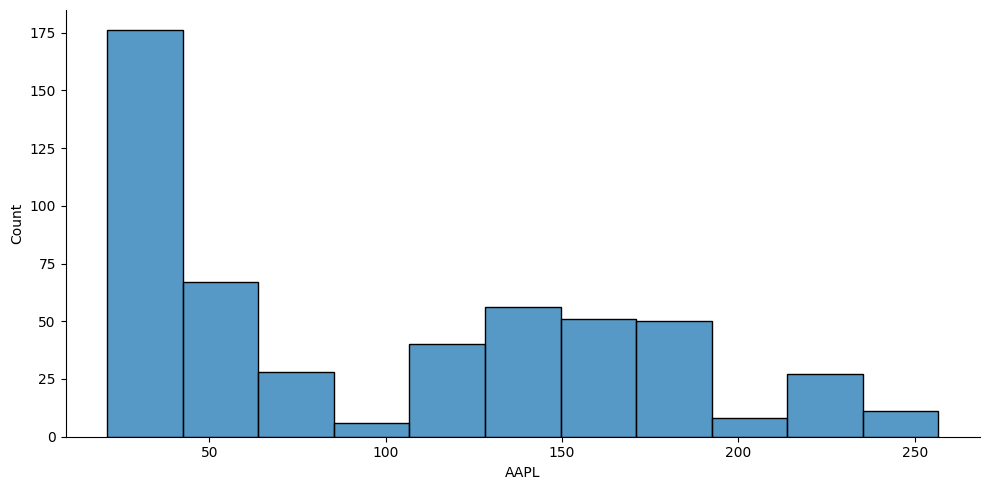

In [58]:
sns.displot(df_downsampled['AAPL'], kind = 'hist', aspect = 2)

<Axes: ylabel='AAPL'>

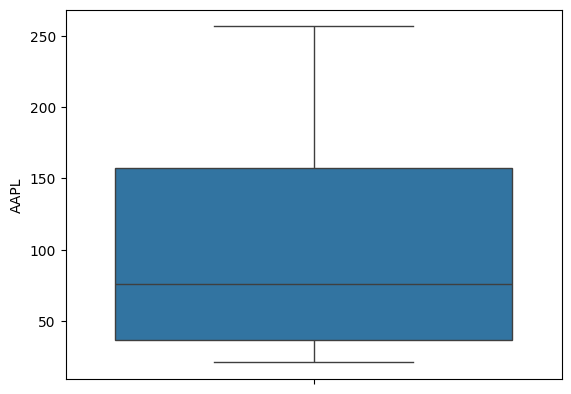

In [60]:
sns.boxplot(df_downsampled.AAPL)

The whis parameter in the boxplot function is set to 1.5 by 
default (1.5 times IQR), which controls the width or distance between the upper and lower fences. Larger values mean fewer observations will be deemed as outliers, and smaller values will make non-outlier points seem outside of boundaries (more outliers). 

<Axes: ylabel='AAPL'>

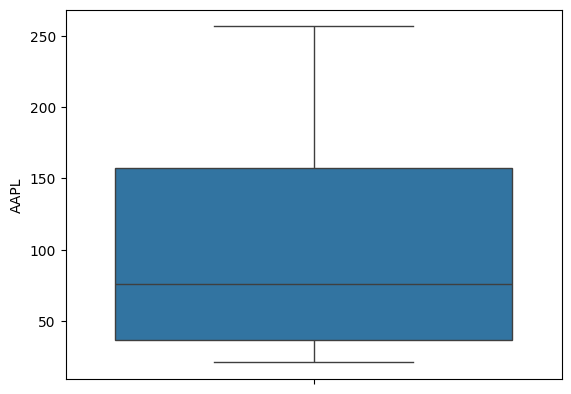

In [62]:
sns.boxplot(df_downsampled.AAPL, whis=1.5)

<Axes: ylabel='AAPL'>

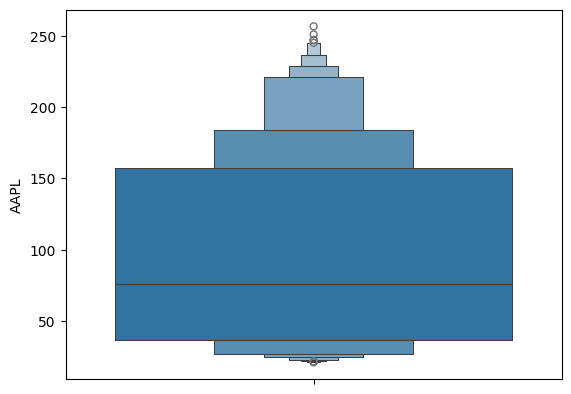

In [64]:
sns.boxenplot(df_downsampled.AAPL)

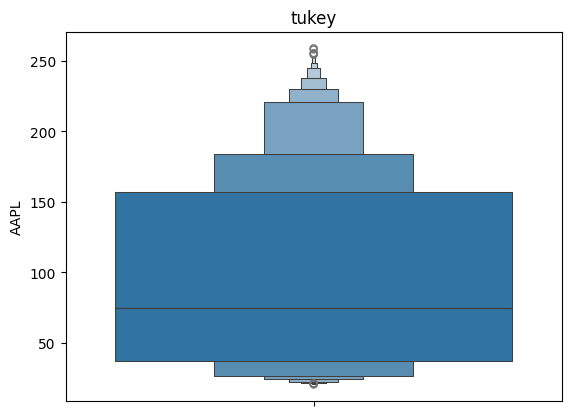

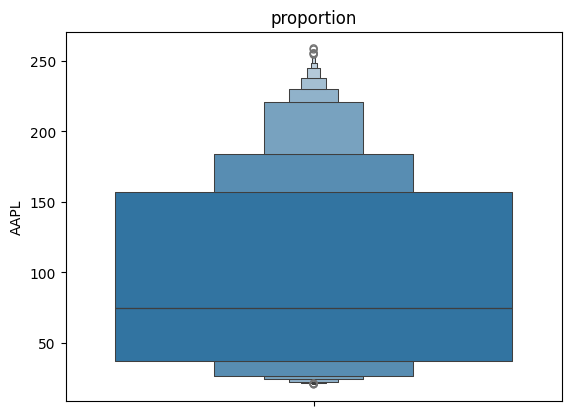

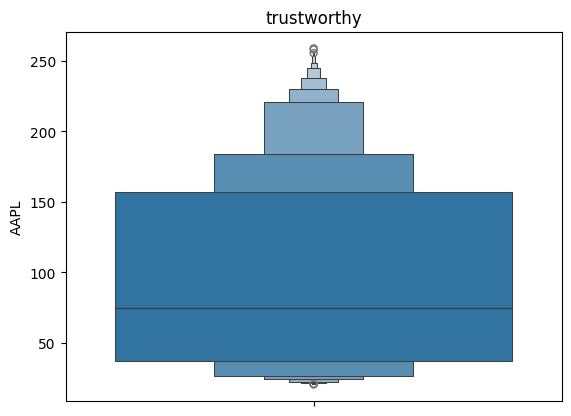

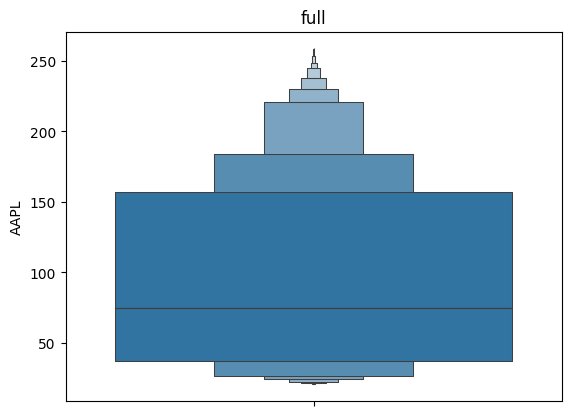

In [78]:
for k in ['tukey', 'proportion', 'trustworthy', 'full']:
    sns.boxenplot(dt.AAPL, k_depth = k)
    plt.title(k)
    plt.show()

<Axes: ylabel='AAPL'>

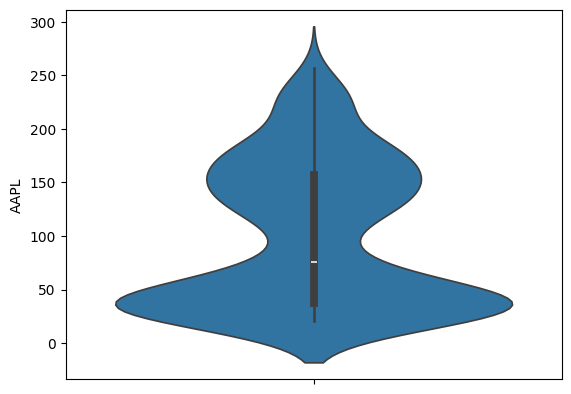

In [66]:
sns.violinplot(df_downsampled.AAPL)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

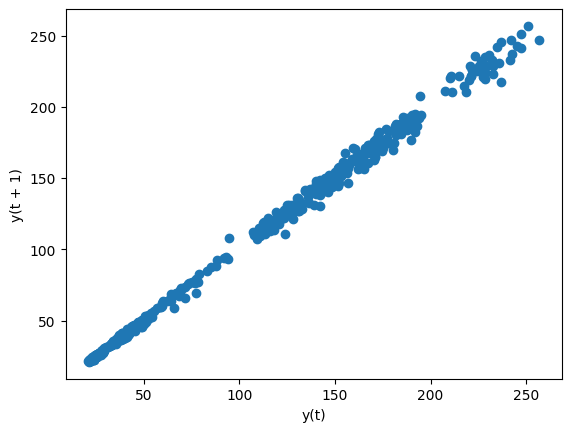

In [86]:
from pandas.plotting import lag_plot
lag_plot(df_downsampled.AAPL)
# don't pay attention to t+1

<Axes: >

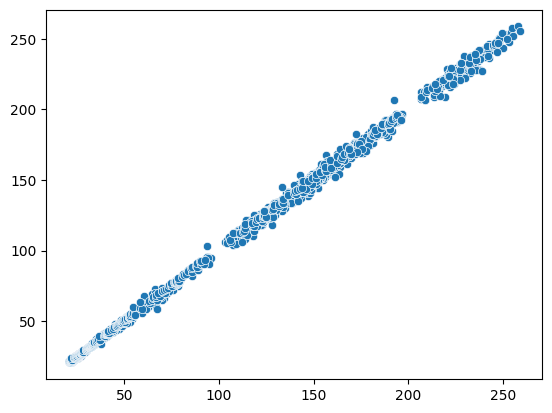

In [84]:
y = dt.AAPL[1:].values.reshape(-1)
x = dt.AAPL[:-1].values.reshape(-1)
sns.scatterplot(x=x, y=y)

In [88]:
percentiles = [0, 0.05, .10, .25, .5, .75, .90, .95, 1]
df_downsampled.AAPL.describe(percentiles= percentiles)
# 0% is minimum whist
# 100% is maximum whist
# 25% is Q1, 50% is median, 75% is Q3

count    520.000000
mean      99.386048
std       68.163521
min       21.035205
0%        21.035205
5%        24.211614
10%       25.792833
25%       36.959892
50%       75.879432
75%      157.041434
90%      189.910764
95%      224.132348
100%     256.737724
max      256.737724
Name: AAPL, dtype: float64

In [92]:
# outlier identifier function
def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    return data[(data.value > upper_fence) | (data.value < lower_fence)]

In [98]:
outliers = iqr_outliers(dt)
outliers

### z score

In [118]:
# z score function
def zscore(df, column_name, degree=3):
    data = df.copy()
    data['zscore'] = (data[column_name] - data[column_name].mean()) / data[column_name].std()
    outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
    return outliers[column_name], data

In [120]:
threshold = 2.5
outliers, transformed = zscore(dt, 'AAPL', threshold)

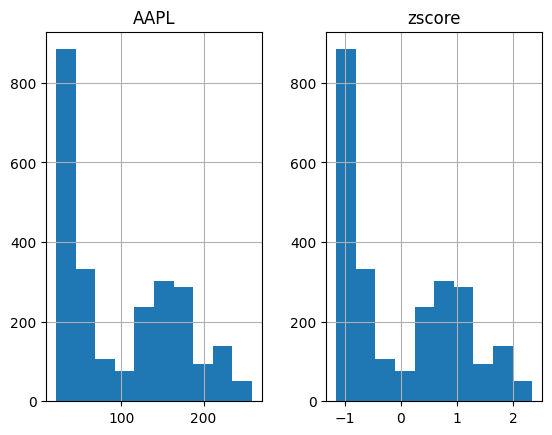

In [132]:
transformed[['AAPL', 'zscore']].hist(); 

In [138]:
# plot_outliers(outliers, dt.AAPL, 'Outliers using Z-score')

In [150]:
def plot_zscore(data, d=3):
    n = len(data)
    plt.figure(figsize=(10, 6))
    plt.plot(data, 'k^')
    plt.plot([0, n], [d, d], 'r--')
    plt.plot([0, n], [-d, -d], 'r--')

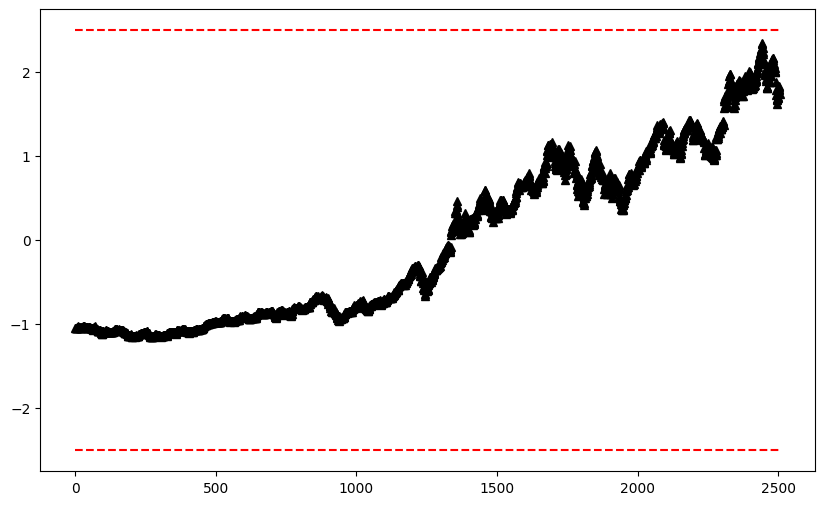

In [152]:
data = transformed['zscore'].values
plot_zscore(data, d=2.5)

#### kstest_normal
The z-score is a parametric method and assumes the data comes from a Gaussian (normal) distribution. There are several tests available in the statsmodels library to test if the data is normally distributed. One of these tests is the Kolmogorov-Smirnov test. The null hypothesis is that the data comes from a normal distribution. The test returns the test statistics and a p-value; if the p-value is less than 0.05, you can reject the null hypothesis (data is not normally distributed). Otherwise, you would fail to reject the null hypothesis (data is normally distributed). 

In [163]:
from statsmodels.stats.diagnostic import kstest_normal
def test_normal(df):
    t_test, p_value = kstest_normal(df)
    if p_value < 0.05:
        print('Reject null hypothesis. Data is not normally distributed')
    else:
        print('Fail to reject null hypothesis. Data is normally distributed')

In [165]:
test_normal(dt.AAPL)

Reject null hypothesis. Data is not normally distributed


In [167]:
print(outliers)

Series([], Name: AAPL, dtype: float64)


### MAD

In [172]:
import scipy.stats as stats
stats.norm.ppf(0.75)

0.6744897501960817

### QQ plot (Quantile-Quantile plot)

In [193]:
# you have the code

<Axes: xlabel='Date'>

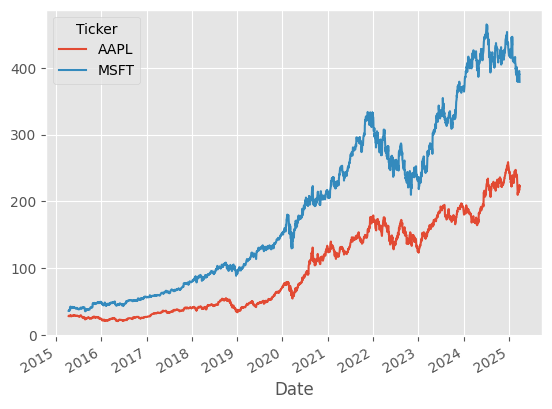

In [197]:
plt.style.use('ggplot')
dt.plot()

<Axes: xlabel='Date'>

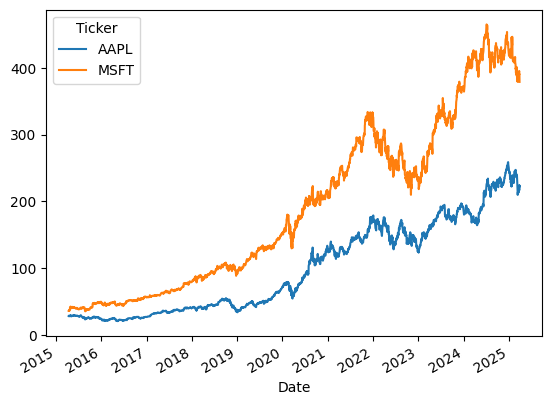

In [205]:
plt.style.use('fivethirtyeight')
plt.style.use('default')
dt.plot()

### ADF & KPSS

In [208]:
from statsmodels.tsa.stattools import adfuller, kpss

In [210]:
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test == 'kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'
    output_dict = {
        'Test Statistic': test_score, 
        'p-value': pval,
        'Numbers of lags': lags, 
        'decision': decision
    }

    for key, value in critical.items():
        output_dict['Critical Value (%s)' % key] = value

    return pd.Series(output_dict, name=test)

In [214]:
adf_output = adfuller(dt.AAPL)
kpss_output = kpss(dt.AAPL)

C:\Users\khali\AppData\Local\Temp\ipykernel_10556\3679697459.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(dt.AAPL)


In [216]:
pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

,adf,kpss
Test Statistic,-0.095598,7.725236
p-value,0.949875,0.01
Numbers of lags,0,30
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.432962,0.739
Critical Value (5%),-2.862694,0.463
Critical Value (10%),-2.567384,0.347
Critical Value (2.5%),NaN,0.574


In [220]:
# adfuller(dt.AAPL)

# 9. EDA & Diagnostics

In [252]:
# from statsmodels.datasets import co2, get_rdataset

In [250]:
# air_passengers = get_rdataset('AirPassengers')

In [248]:
# air_df = air_passengers.data

In [246]:
# air_df.head()

<Axes: ylabel='Frequency'>

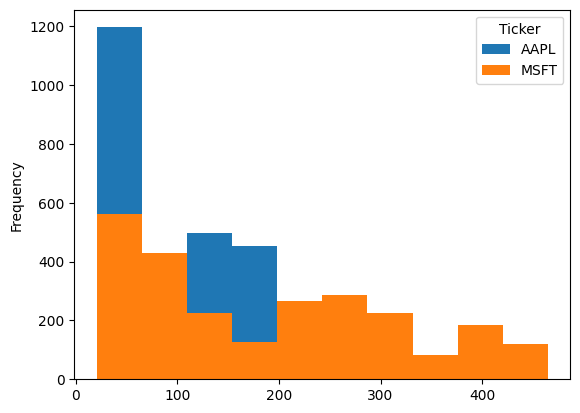

In [274]:
dt.plot(kind='hist')

<Axes: xlabel='Date'>

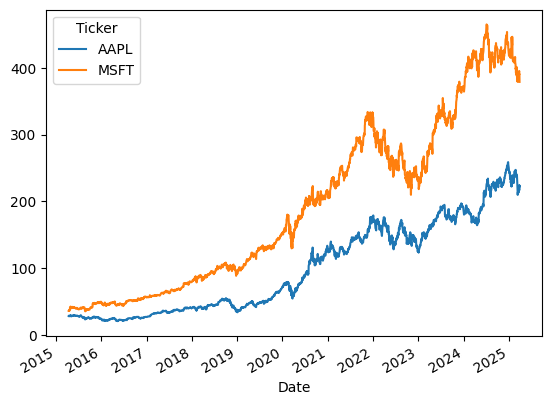

In [286]:
dt.plot.line()

### Normalize
If you want to see how the prices fluctuate (up or down) in comparison to each 
other, one easy approach is to normalize the data

In [291]:
dt_normalized = dt.div(dt.iloc[0])

<Axes: xlabel='Date'>

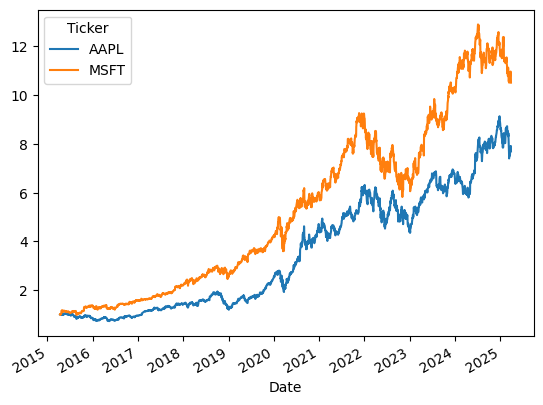

In [293]:
dt_normalized.plot()

In [295]:
dt_normalized.head()

Ticker,AAPL,MSFT
Date,,
2015-04-13,1.000000,1.000000
2015-04-14,0.995664,0.997366
2015-04-15,0.999448,1.011973
2015-04-16,0.994639,1.009579
2015-04-17,0.983445,0.996648


<Axes: xlabel='Date', ylabel='Normalized Price'>

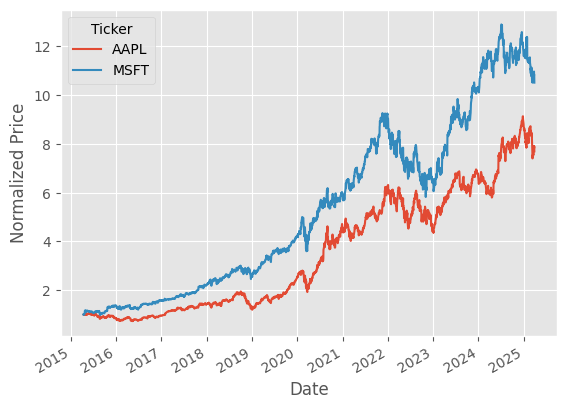

In [319]:
plt.style.use('ggplot')
dt_normalized.plot(ylabel='Normalized Price', xlabel='Date')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

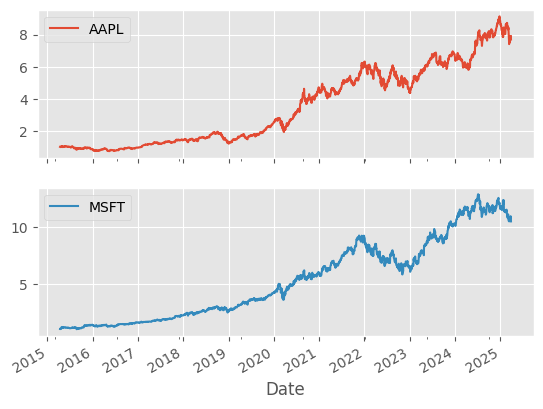

In [326]:
dt_normalized.plot(subplots = True)

In [328]:
import hvplot.pandas
import hvplot as hv

In [330]:
dt_normalized.hvplot(title = 'TS plot using hvplot')

:NdOverlay   [Ticker]
   :Curve   [Date]   (value)

In [334]:
dt_normalized.plot(backend = 'hvplot', title='TS plot interactive')

:NdOverlay   [Ticker]
   :Curve   [Date]   (value)

In [346]:
# the .cols() method only works if the subplots parameter is set to True. 
# Otherwise, you will get an error.
dt_normalized.hvplot(width=300, subplots=True).cols(2)

:NdLayout   [Ticker]
   :Curve   [Date]   (value)

In [360]:
# The plus sign (+) allows you to add two charts side by side,
# while multiply (*) will enable you to combine charts (merge one graph with another).
(dt_normalized.AAPL.hvplot(width=500) * dt_normalized.MSFT.hvplot(width=500))

:Overlay
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [364]:
(dt_normalized.AAPL.hvplot(width=300) + dt_normalized.MSFT.hvplot(width=300))

:Layout
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

### Decomposing Time Series Data

In [367]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [375]:
# dt.AAPL.plot(figsize=(20, 10))

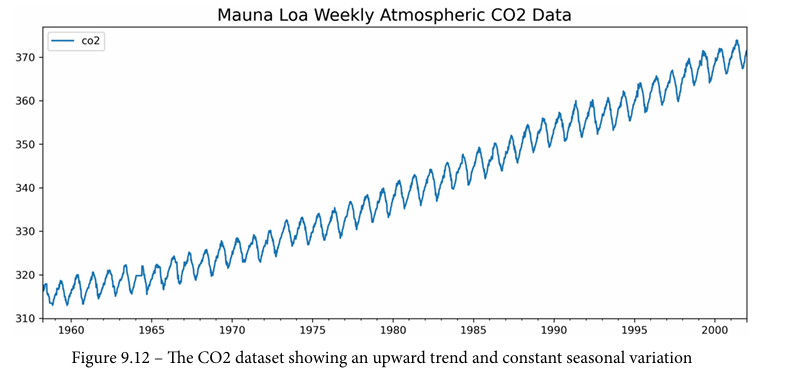

The co2_df data shows a long-term linear (upward) trend, with a repeated seasonal pattern at a constant rate (seasonal variation). This indicates that the CO2 dataset is an additive model.

<Axes: >

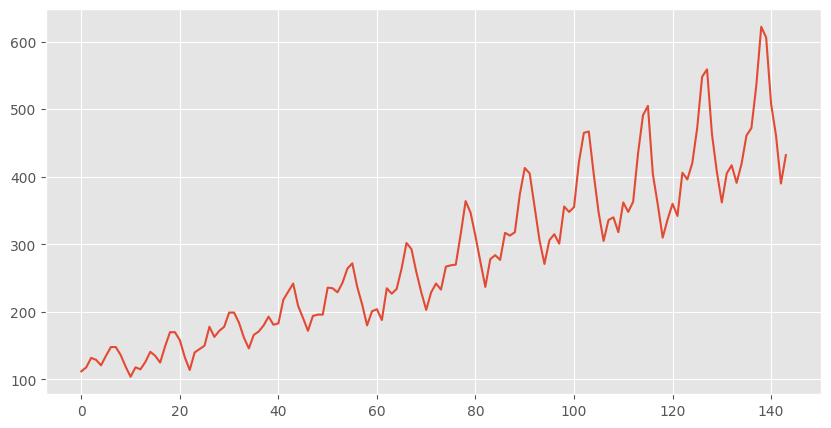

In [379]:
air_df.value.plot(figsize=(10, 5))

data shows a long-term linear (upward) trend and seasonality. 
However, the seasonality fluctuations seem to be increasing as well, indicating
a multiplicative modelel

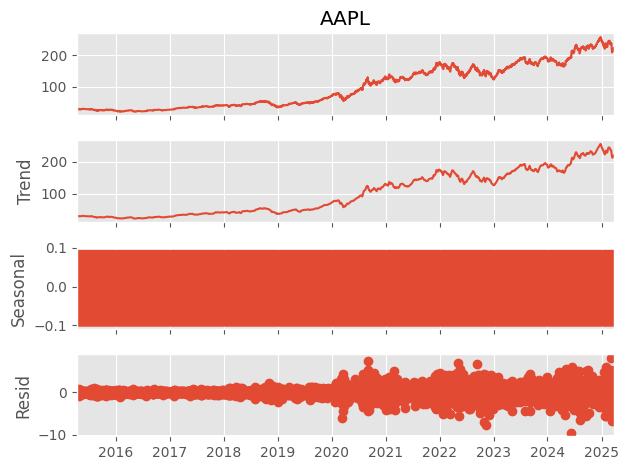

In [452]:
dt_decomposed = seasonal_decompose(dt.AAPL, model='additive')
dt_decomposed.plot(); plt.show()

<Axes: xlabel='Date'>

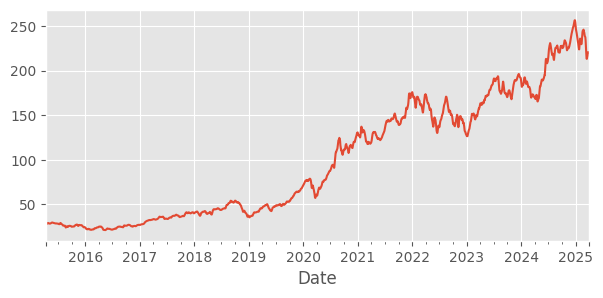

In [464]:
(dt_decomposed.trend).plot(figsize=(7, 3))

<Axes: xlabel='Date'>

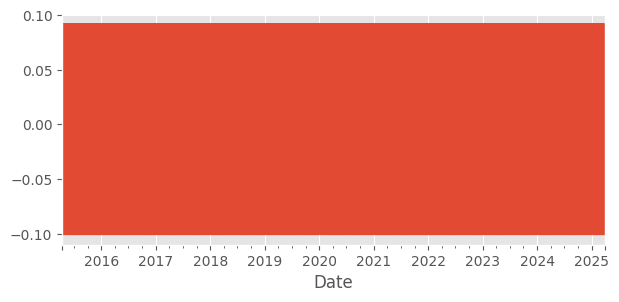

In [466]:
(dt_decomposed.seasonal).plot(figsize=(7, 3))

<Axes: xlabel='Date'>

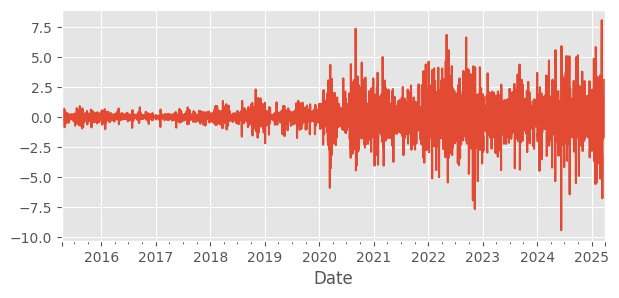

In [468]:
(dt_decomposed.resid).plot(figsize=(7, 3))

<Axes: xlabel='Date'>

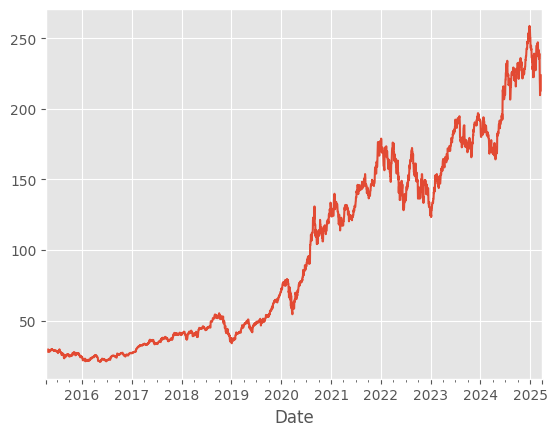

In [483]:
(dt_decomposed.trend + dt_decomposed.seasonal + dt_decomposed.resid).plot()
# (dt_decomposed.trend * dt_decomposed.seasonal * dt_decomposed.resid).plot()
# if it was multiplicative then use *

### More Advanced Decomposition Technique: STL

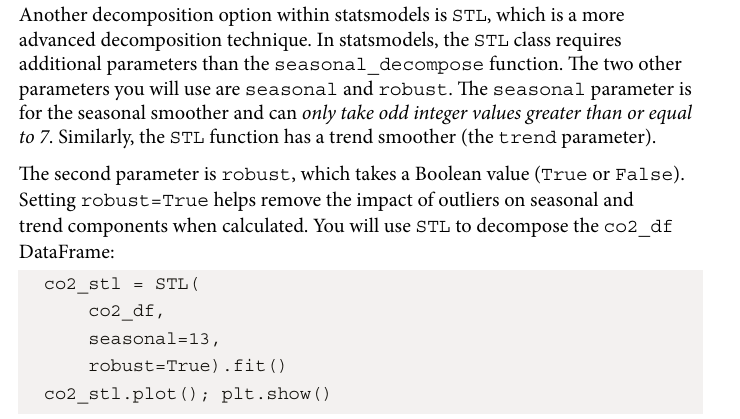

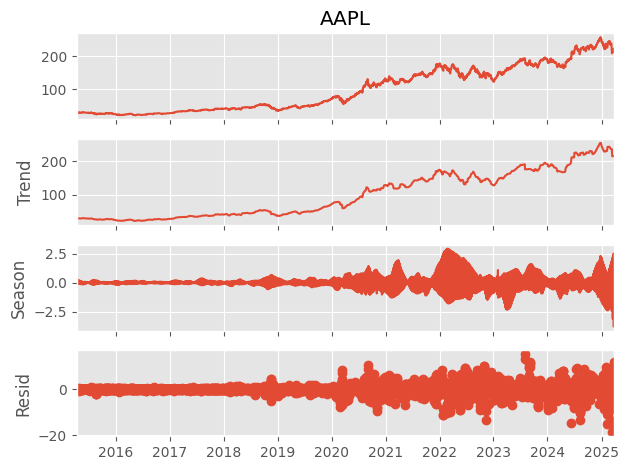

In [506]:
dt_STL_decomposed = STL(
    dt.AAPL, 
    seasonal = 13,
    robust = True # remove the impact of outliers
).fit()
dt_STL_decomposed.plot(); plt.show()

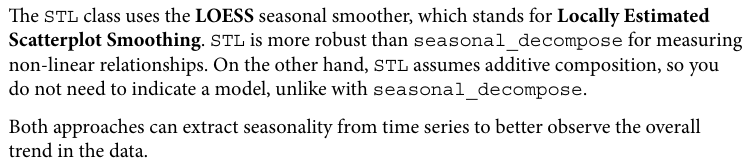

The Hodrick-Prescott filter is a smoothing filter that can be used to separate short-term fluctuations (cyclic variations) from long-term trends. This is implemented as hp_filter in the statsmodels library.\
Recall that STL and seasonal_decompose returned three components (trend, seasonal, and residual). On the other hand, hp_filter returns two components: a cyclical component and a trend component. 

In [512]:
from statsmodels.tsa.filters.hp_filter import hpfilter
dt_cyclic, dt_trend = hpfilter(dt.AAPL)

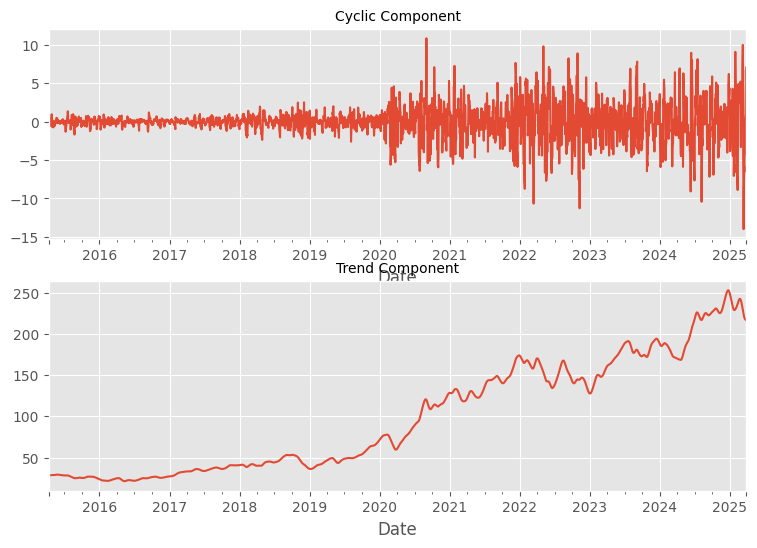

In [546]:
# plt.rcParams["figure.figsize"] = (9,6)
fig, ax = plt.subplots(2, 1)
dt_cyclic.plot(ax=ax[0], title='Cyclic Component')
dt_trend.plot(ax=ax[1], title='Trend Component')
ax[0].title.set_size(10)
ax[1].title.set_size(10)

### Detecting Time Series Stationarity

Generally, a time series with trend or seasonality can be considered non-stationary. Usually, spotting trends or seasonality visually in a plot can help you determine whether the time series is stationary or not. In such cases, a simple line plot would suffice. But in this recipe, you will explore statistical tests to help you identify a stationary or non-stationary time series numerically. You will explore testing for stationarity and techniques for making a time series stationary.

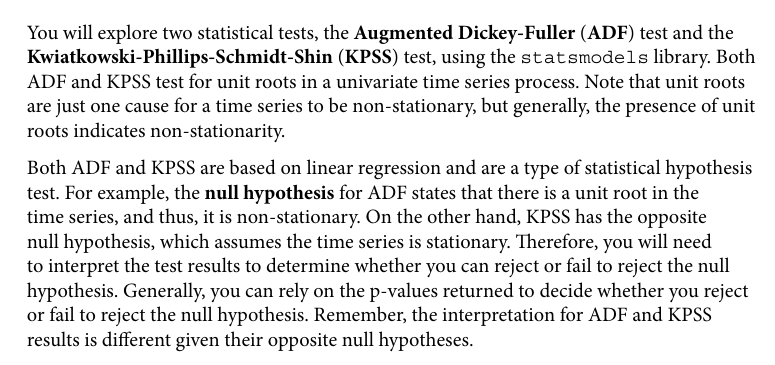

In [551]:
from statsmodels.tsa.stattools import adfuller, kpss

In [553]:
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test == 'kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'
    output_dict = {
        'Test Statistic': test_score, 
        'p-value': pval,
        'Numbers of lags': lags, 
        'decision': decision
    }

    for key, value in critical.items():
        output_dict['Critical Value (%s)' % key] = value

    return pd.Series(output_dict, name=test)

In [555]:
adf_output = adfuller(dt.AAPL)
kpss_output = kpss(dt.AAPL)

C:\Users\khali\AppData\Local\Temp\ipykernel_10556\3679697459.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(dt.AAPL)


In [557]:
pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

,adf,kpss
Test Statistic,-0.049425,8.892391
p-value,0.954249,0.01
Numbers of lags,21,38
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.43216,0.739
Critical Value (5%),-2.86234,0.463
Critical Value (10%),-2.567196,0.347
Critical Value (2.5%),NaN,0.574


### Non-Stationary -> Stationary methods

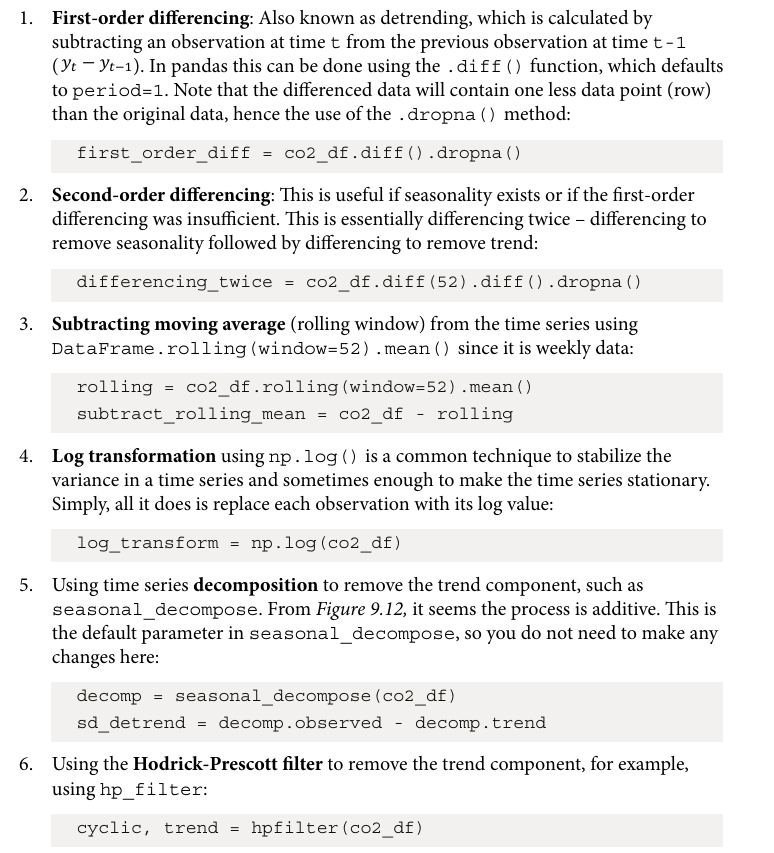

In [565]:
first_order_diff = dt.diff().dropna()

In [567]:
diff_twice = dt.diff().diff().dropna()

In [569]:
rolling = dt.rolling(window=52).mean()
subtract_rolling_mean = dt - rolling

In [571]:
log_transform = np.log(dt)

In [573]:
decomp = seasonal_decompose(dt.AAPL)
sd_detrend = decomp.observed - decomp.trend

In [579]:
cyclic, trend = hpfilter(dt.AAPL)

In [583]:
# combine methods into a Python list to compare
methods = [first_order_diff, diff_twice, subtract_rolling_mean, log_transform, 
          sd_detrend, cyclic]

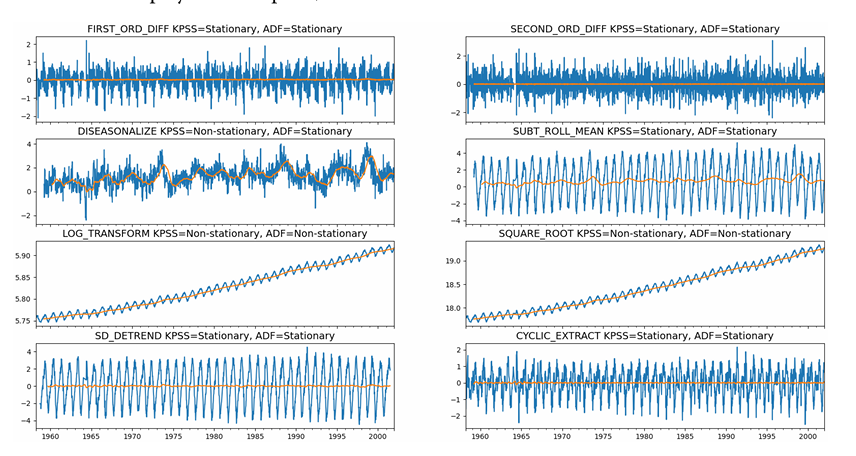

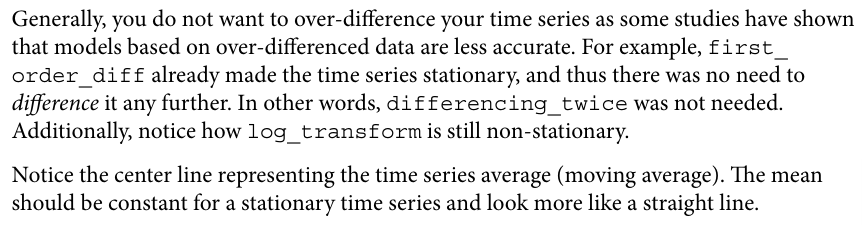

---
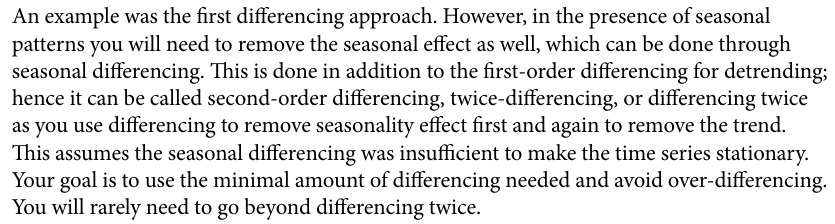

---

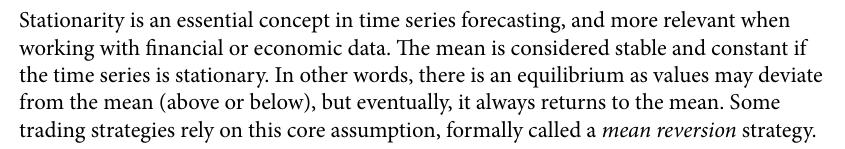

### OLS - Ordinary Least Squares regression

=> OLS regression is used to compute the model's coefficients. ADF and KPSS use OLS regression.

In [622]:
adf_result = adfuller(first_order_diff.AAPL, store = True)
# to view OLS results for ADF, set store = True

In [628]:
adf_result

(-13.173802979973845,
 1.235009654121046e-24,
 {'1%': -3.432159720193857,
  '5%': -2.862339633287972,
  '10%': -2.56719565730786},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2dff4105010>)

The last item after 1%-10% intervals is `ResultStore` object. You can access by following code:

In [635]:
# adf_result[3] as it is the last item or [-1]
adf_result[-1].resols.summary()

# The ResultStore object gives you access to .resols, which contains the .summary() method.
# This should produce the following output:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     178.4
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:28:13   Log-Likelihood:                -7013.3
No. Observations:                3616   AIC:                         1.407e+04
Df Residuals:                    3594   BIC:                         1.421e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0306      0.078    -13.174      0.000      -1.184      -0.877
x2             0.0266      0.076      0.348      0.728      -0.123       0.176
x3             0.0134      0.074      0.181      0.857      -0.132       0.159
x4             0.0063      0.072      0.087      0.931      -0.135       0.148
x5             0.0081      0.070      0.115      0.908      -0.130       0.146
x6            -0.0033      0.068     -0.048      0.962      -0.137       0.131
x7             0.0154      0.066      0.233      0.816      -0.114       0.145
x8             0.0310      0.064      0.484      0.628      -0.095       0.157
x9             0.0300      0.062      0.484      0.629      -0.091       0.151
x10            0.0183      0.059      0.307      0.759      -0.098       0.135
x11           -0.0148      0.057     -0.259      0.795      -0.126       0.097
x12           -0.0105      0.054     -0.194      0.846      -0.117       0.096
x13           -0.0285      0.051     -0.554      0.580      -0.129       0.072
x14            0.0360      0.049      0.739      0.460      -0.060       0.132
x15            0.0019      0.046      0.041      0.967      -0.088       0.092
x16            0.0247      0.043      0.579      0.563      -0.059       0.108
x17            0.0336      0.039      0.865      0.387      -0.043       0.110
x18            0.0140      0.035      0.403      0.687      -0.054       0.082
x19           -0.0053      0.030     -0.178      0.859      -0.064       0.053
x20           -0.0146      0.024     -0.604      0.546      -0.062       0.033
x21            0.0361      0.017      2.130      0.033       0.003       0.069
const          0.0540      0.028      1.902      0.057      -0.002       0.110
==============================================================================
Omnibus:                      627.000   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13475.524
Skew:                          -0.110   Prob(JB):                         0.00
Kurtosis:                      12.455   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

^ ADF OLS regression summary and the lags and their coefficients 

The ADF test's p-value (the overall test statistic) should be the key indicator for stationarity, not the individual lag coefficients. Focus on the test p-value instead of worrying too much about the lag-specific p-values.
